In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
hack_data=pd.read_csv('/content/drive/MyDrive/data (3).csv')
hack_data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [3]:
hack_data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [4]:
hack_data['x1'].mean()

-4.818766123605403

In [5]:
is_NaN = hack_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = hack_data[row_has_NaN]

In [6]:
rows_with_NaN

,x1,x2,y
36,NaN,116.138522,1
44,-99.627522,NaN,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1092,55.162258,NaN,0
1318,NaN,53.182191,0
1430,-74.126054,NaN,0


In [7]:
hack_data.dropna(inplace=True)

In [8]:
hack_data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [9]:
hack_data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


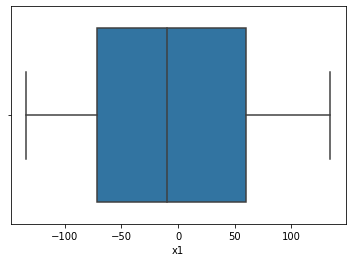

In [10]:
sns.boxplot(hack_data['x1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


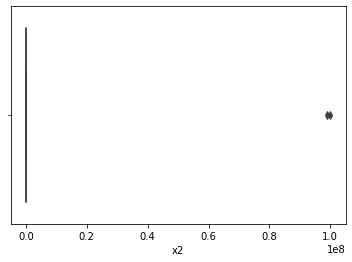

In [11]:
sns.boxplot(hack_data['x2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


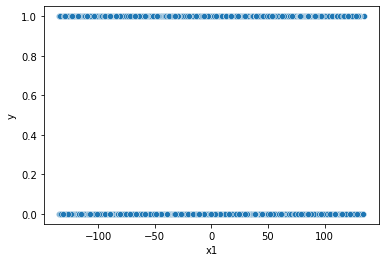

In [12]:
sns.scatterplot('x1','y',data=hack_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


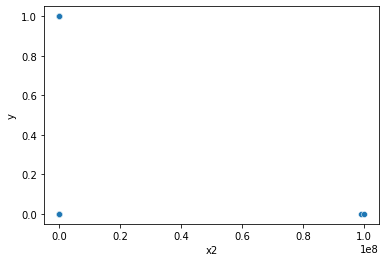

In [13]:
sns.scatterplot('x2','y',data=hack_data)

In [14]:
X=hack_data.drop(columns=['y'])
Y=hack_data['y']

In [15]:
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [16]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=tree.DecisionTreeClassifier()
svm=SVC()

In [17]:
np.random.seed(0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [18]:
def Model(z,a,b,c,d):
    
    #Fitting the Classification Models
    z.fit(a,c)
    y_train_pred=z.predict(a)
    y_test_pred=z.predict(b)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,a,c,scoring='accuracy',cv=7)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(c,y_train_pred)
    testing_score = accuracy_score(d,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(c,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(d,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(c,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(d,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(d,y_test_pred,average=None))

In [19]:
Model(lr,X_train,X_test,Y_train,Y_test)

cv_score 0.5930484459896225
TRAINING SCORE 0.5949774629748873
TESTING SCORE 0.36786786786786785


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[716 156]
 [473 208]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[241 125]
 [296   4]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       872
           1       0.57      0.31      0.40       681

    accuracy                           0.59      1553
   macro avg       0.59      0.56      0.55      1553
weighted avg       0.59      0.59      0.56      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.45      0.66      0.53       366
           1       0.03      0.01      0.02

In [20]:
Model(knn,X_train,X_test,Y_train,Y_test)

cv_score 0.5582819406348818
TRAINING SCORE 0.7102382485511912
TESTING SCORE 0.7792792792792793


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[688 184]
 [266 415]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[319  47]
 [100 200]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       872
           1       0.69      0.61      0.65       681

    accuracy                           0.71      1553
   macro avg       0.71      0.70      0.70      1553
weighted avg       0.71      0.71      0.71      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       366
           1       0.81      0.67      0.73 

In [21]:
Model(dt,X_train,X_test,Y_train,Y_test)

cv_score 0.9433311786252963
TRAINING SCORE 1.0
TESTING SCORE 0.9429429429429429


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[872   0]
 [  0 681]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[355  11]
 [ 27 273]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       681

    accuracy                           1.00      1553
   macro avg       1.00      1.00      1.00      1553
weighted avg       1.00      1.00      1.00      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       366
           1       0.96      0.91      0.93       300

    

In [22]:
Model(svm,X_train,X_test,Y_train,Y_test)

cv_score 0.5943354472766237
TRAINING SCORE 0.5936896329684481
TESTING SCORE 0.5705705705705706


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[721 151]
 [480 201]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[355  11]
 [275  25]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.60      0.83      0.70       872
           1       0.57      0.30      0.39       681

    accuracy                           0.59      1553
   macro avg       0.59      0.56      0.54      1553
weighted avg       0.59      0.59      0.56      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       366
           1       0.69      0.08      0.15 

In [23]:
svm_linear=SVC(kernel='linear')

In [24]:
Model(svm_linear,X_train,X_test,Y_train,Y_test)

cv_score 0.5614936203171496
TRAINING SCORE 0.5614938828074694
TESTING SCORE 0.5495495495495496


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[872   0]
 [681   0]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[366   0]
 [300   0]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       872
           1       0.00      0.00      0.00       681

    accuracy                           0.56      1553
   macro avg       0.28      0.50      0.36      1553
weighted avg       0.32      0.56      0.40      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       366
           1       0.00      0.00      0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [26]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [27]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    knn, tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, Y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, Y_test))

Best parameters set found on train set:
{'n_neighbors': 1, 'p': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

0.5630630630630631


In [28]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,Y_train)
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [29]:
dt=tree.DecisionTreeClassifier(criterion='gini',max_depth=8,max_features='sqrt')

In [30]:
Model(dt,X_train,X_test,Y_train,Y_test)

cv_score 0.9336699336699337
TRAINING SCORE 0.9471989697359948
TESTING SCORE 0.9369369369369369


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[853  19]
 [ 63 618]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[360   6]
 [ 36 264]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       872
           1       0.97      0.91      0.94       681

    accuracy                           0.95      1553
   macro avg       0.95      0.94      0.95      1553
weighted avg       0.95      0.95      0.95      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       366
           1       0.98      0.88      0.93 

In [31]:
from scipy.stats import reciprocal, uniform
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [32]:
grid = GridSearchCV(svm,param_grid,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   23.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [33]:
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [35]:
svm_tuning=SVC(C=1,gamma=1)

In [36]:
Model(svm_tuning,X_train,X_test,Y_train,Y_test)

cv_score 0.5949818596877421
TRAINING SCORE 0.5930457179652285
TESTING SCORE 0.5615615615615616


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[717 155]
 [477 204]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[365   1]
 [291   9]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       872
           1       0.57      0.30      0.39       681

    accuracy                           0.59      1553
   macro avg       0.58      0.56      0.54      1553
weighted avg       0.59      0.59      0.56      1553



------------------------------------------------------------


CLASSIFICATION REPORT ON TESTING
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       366
           1       0.90      0.03      0.06 